## Numismática México

El proyecto de Numismática México tiene como objetivo principal implementar una estrategia de análisis de datos innovadora para optimizar las ventas y la experiencia del cliente en los eventos de fin de año. A través de la implementación de estrategias basadas en data storytelling, se pretende generar valor para la empresa buscando potenciar la toma de decisiones basada en datos, identificando oportunidades de crecimiento y mejorando la rentabilidad del negocio.


Numismática Mexico es una empresa especializada en ofrecer productos numismáticos a través de una plataforma marketplace.

**NECESIDADES DEL NEGOCIO**


El director de Marketing de NM (Numismática Mexico), está preparando la estrategia comercial para los eventos de fin de año, eventos que comercialmente aportan los mayores ingresos para la empresa, por lo que, con base en el histórico de ventas) tiene especial interés en obtener respuesta a las siguientes preguntas, considerando únicamente los meses de noviembre y diciembre:

▪ ¿Qué días por mes, han sido los más relevantes en cuanto a
ingresos?

▪ ¿Qué productos han tenido las mayores ventas. (Top Ten) ?

▪ Geográficamente, mostrar las ventas por Estado

▪ Tiempos de entrega promedio, por día.


De igual forma requiere poder analizar los datos de forma dinámica, por lo que solicita un tablero de control que le permita apreciar por rangos de fecha:

▪ KPI's de: Ventas, Cantidad de Unidades vendidas, Ventas por Publicidad, Ventas sin publicidad y Ventas Totales.

▪ Visualización donde se puedan apreciar las ventas con y sin publicidad por día .

▪ Ventas por producto

▪ Ventas por Estado

Además requiere que las visualizaciones de Ventas por producto y Ventas por Estado se filtren con base en el día que se seleccione de la visualización de las ventas con y sin publicidad.



## Etapa 1 Contexto del problema, entender los datos.

Actividades Previas:

• Identificar el contexto de la numismástica y del ecommerce.

• Entender los requerimiento del negocio del proyecto

• Conocer y explorar los datos.


#### Actividades a entregar

• Datos del proyecto : Un breve encabezado con el nombre del Proyecto.

• Presentación de objetivos e idea: En cuatro o cinco líneas, su lectura debe ayudar a comprender de qué proyecto se trata. Hay que resaltar la idea que lo hace diferente y el objetivo básico que persigue.

• Beneficios del proyecto: Resaltar los beneficios que aportará al negocio el implementar el proyecto de analítica, logrando definir una estrategia sustentada en los datos.

• Definir Indicadores del negocio: Generar una tabla que contenga los siguientes puntos:

• Identificar KPIs.

• Preguntas que responden los tipos de análisis.

• Tipos de datos que se pueden analizar (Se pueden incluir datos proporcionados). 


In [1]:
# Exploración de los datos

import pandas as pd

file_name = 'Ventas Numismática MéxicoversAgo.xlsx'
df = pd.read_excel(file_name)

Después de la exploración visual del data frame podemos ver que los datos de los que disponemos son:

| Campo | Tipo de dato | Descripción |
|:-----------|:-----------:|-----------|
| IDVenta | Numérico | Identificador de la venta |
| Unidades | Numérico (Entero) | Unidades que se vendieron |
| Ingresos por productos (MXN) | Numérico (float) | Ingresos brutos |
| Cargo por venta e impuestos | Numérico (float) | Impuestos o gastos por deducir |
| Costos de envío | Numérico (float) | Impuestos o gastos por deducir |
| Total (MXN) | Numérico (float)| Ingresos netos |
| Venta por publicidad | Booleano | Fue una venta espontanea o por campaña |
| IDproducto | Numérico | Identificador del producto |
| Canal de venta | String (categorico) | Plataforma por donde se vendió |
| Precio unitario de venta de la publicación (MXN | Valor 10,2 | Impuestos o gastos por deducir |
| Municipio/Alcaldía	 | String (categorico) | Alcaldía de destino |
| Estado | String (categorico) | Estad de destino |
| Código postal | Numérico | Dirección de destino |
| Forma de entrega | String (categorico) | Medio de envio |
| Transportista | String (categorico) | - |
| Fecha Venta | Date | - |
| FechaCamino | Date | - |
| FechaEntrega | Date | - |





Se nos dice que debemos limitar el análisis de los meses de noviembre y diciembre; además dado que se busca preparar la estretegia del negocio del proximo año, y considerando las preguntas claves que nos dan, podemos centrar el análisis en saber:

* Si las ventas por publicidad generan un incremento en las KPIS contrastadas con las ventas naturales

* El top ten de productos vendidos

* Estados para enfocar (podemos buscar caracteristicas en los de mejores ventas y aplicar estrategias en los de bajas)

* Mismo caso para productos

* Tiempos de entrega (ver que distribuidor lo hace mejor y si influye en las KPI's)



In [2]:
from datetime import datetime

# Convertimos a datetime para poder manejar y filtrar la fecha
df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'], format = '%d/%m/%Y').dt.date

# Vemos que años hay de información
fecha = sorted(list(df['Fecha Venta'].unique()))

"""Lo anterior muetra que hay ventas desde septiembre de 2021 hasta septiembre de 2022"""
"""Por lo que extraemos noviembre y diciembre de 2021"""

df = df[(df['Fecha Venta'] >= datetime(2021,11,1).date())&(df['Fecha Venta'] <= datetime(2021,12,31).date())]
df.reset_index(drop=True, inplace=True)

In [3]:
# Obtenemos la información de los productos más vendidos
top_ten = df['IDproducto'].value_counts().reset_index()
top_ten.columns = ['IDproducto', 'Frecuencia']

# Obtenemos la información de los productos más vendidos particionados por estado
top_ten_by_state = df.groupby(by=['IDproducto', 'Estado']).size().reset_index(name='Frecuencia')
top_ten_by_state = top_ten_by_state.sort_values(by=['Estado', 'Frecuencia'], ascending=[True, False])

In [4]:
# Productos más vendidos
top_ten.head(10)

,IDproducto,Frecuencia
0,MLM797896213,237
1,MLM775876787,127
2,MLM797897673,95
3,MLM803071179,38
4,MLM937274388,33
5,MLM759252135,21
6,MLM774183442,15
7,MLM797899556,11
8,MLM926168327,9
9,MLM1339790000,8


In [5]:
# Productos que más ingresos netos dejan
top_ten_sales = df.groupby(by='IDproducto')['Total (MXN)'].sum().reset_index(name='Ingresos netos').sort_values(by='Ingresos netos', ascending=False)
top_ten_sales.head(10)

,IDproducto,Ingresos netos
12,MLM797896213,36055.440224
9,MLM775876787,21614.579819
13,MLM797897673,14429.790142
15,MLM803071179,6017.919968
21,MLM937274388,4601.160011
5,MLM759252135,4289.939972
8,MLM774183442,2526.510002
1,MLM1339790000,2217.880005
20,MLM926168327,1649.480019
14,MLM797899556,1577.560013


In [6]:
# Ventas por estado

top_ten_states = df.groupby(by='Estado').size().reset_index(name='Frecuencia')
top_ten_states = top_ten_states.sort_values(by='Frecuencia', ascending=False)
top_ten_states.head(10)

,Estado,Frecuencia
10,Estado De México,83
8,Distrito Federal,64
14,Jalisco,53
29,Veracruz,42
18,Nuevo León,37
11,Guanajuato,30
5,Chihuahua,29
6,Coahuila,28
20,Puebla,25
15,Michoacán,23


In [7]:
# Estados que más ingresos netos dejan
top_ten_sales = df.groupby(by='Estado')['Total (MXN)'].sum().reset_index(name='Ingresos netos').sort_values(by='Ingresos netos', ascending=False)
top_ten_sales.head(10)

,Estado,Ingresos netos
10,Estado De México,12643.880081
8,Distrito Federal,9963.470070
14,Jalisco,8576.690018
18,Nuevo León,6551.769974
29,Veracruz,6307.950066
15,Michoacán,4963.339973
6,Coahuila,4936.510078
20,Puebla,4648.059982
11,Guanajuato,4521.400024
5,Chihuahua,4163.949970


In [8]:
# Ventas por publicidad
sales_by_publicity = df['Venta por publicidad'].value_counts().reset_index()
sales_by_publicity.columns = ['Venta por publicidad', 'Num. ventas']

sales_by_publicity

,Venta por publicidad,Num. ventas
0,No,516
1,Sí,116


In [9]:
# Ingresos netos por publicidad

top_ten_sales = df.groupby(by='Venta por publicidad')['Total (MXN)'].sum().reset_index(name='Ingresos netos').sort_values(by='Ingresos netos', ascending=False)

top_ten_sales

,Venta por publicidad,Ingresos netos
0,No,83514.000099
1,Sí,18939.170113


In [10]:
# Dias mas relevantes en cuanto a ingresos

df['month'] = df['Fecha Venta'].apply(lambda x: x.month)

important_days = df.groupby(by=['month', 'Fecha Venta'])['Total (MXN)'].sum().reset_index(name='Ingresos netos')

november_importants = important_days[important_days['month']==11].sort_values(by='Ingresos netos', ascending=False).head(5)
december_importants = important_days[important_days['month']==12].sort_values(by='Ingresos netos', ascending=False).head(5)


In [11]:
november_importants

,month,Fecha Venta,Ingresos netos
7,11,2021-11-08,4752.179970
28,11,2021-11-29,3178.480003
10,11,2021-11-11,2882.580032
14,11,2021-11-15,2843.309967
0,11,2021-11-01,2368.900040


In [12]:
december_importants

,month,Fecha Venta,Ingresos netos
49,12,2021-12-20,5423.729996
47,12,2021-12-18,4379.510033
45,12,2021-12-16,4001.189987
42,12,2021-12-13,3542.599998
48,12,2021-12-19,3218.490005


In [13]:
df['FechaEntrega'] = pd.to_datetime(df['FechaEntrega'])
df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'], format='%d/%m/%Y')

# Calcular la duración (tiempo de entrega) y almacenarla en una nueva columna llamada 'Duration'
df['Duration'] = df['FechaEntrega'] - df['Fecha Venta']

# Extraer el número de días de la columna 'Duration'
df['Duration'] = df['Duration'].dt.days

In [36]:
delivery_duration = df.groupby(by=['Fecha Venta', 'month'])['Duration'].mean().reset_index(name='AVG Duration')

november = delivery_duration[delivery_duration['month']==11]
december = delivery_duration[delivery_duration['month']==12]

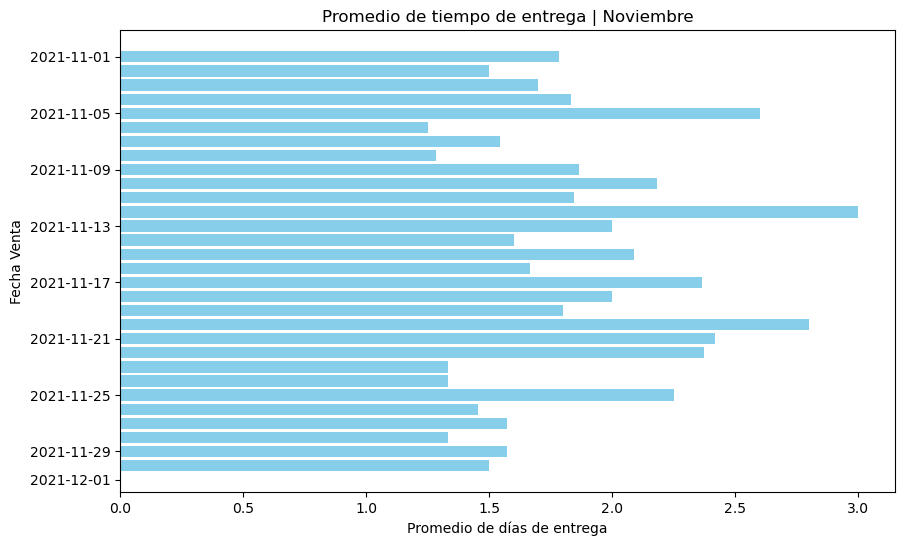

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(november['Fecha Venta'], november['AVG Duration'], color='skyblue')
plt.xlabel('Promedio de días de entrega')
plt.ylabel('Fecha Venta')
plt.title('Promedio de tiempo de entrega | Noviembre')
plt.gca().invert_yaxis()  
plt.show()

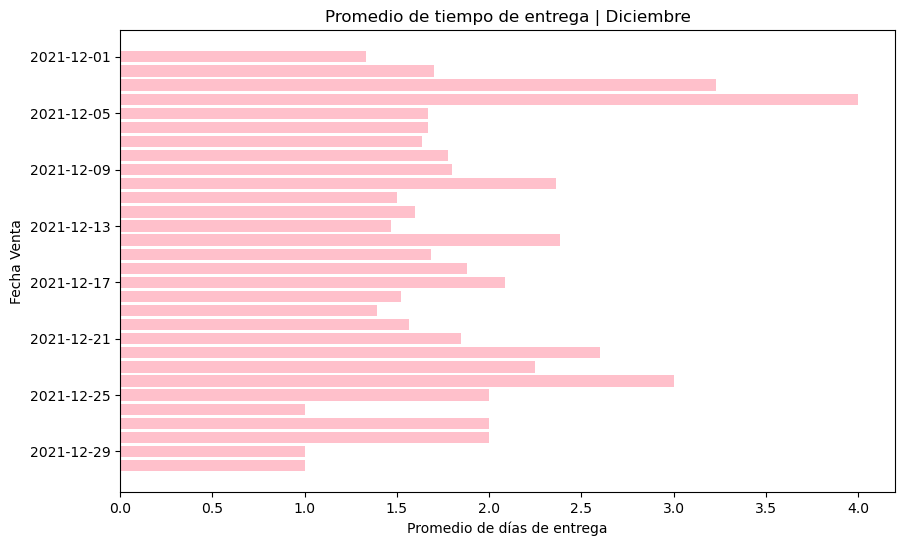

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(december['Fecha Venta'], december['AVG Duration'], color='pink')
plt.xlabel('Promedio de días de entrega')
plt.ylabel('Fecha Venta')
plt.title('Promedio de tiempo de entrega | Diciembre')
plt.gca().invert_yaxis()  
plt.show()

In [40]:
delivery_duration = df.groupby(by=['Transportista', 'month'])['Duration'].mean().reset_index(name='AVG Duration')

november = delivery_duration[delivery_duration['month']==11]
december = delivery_duration[delivery_duration['month']==12]

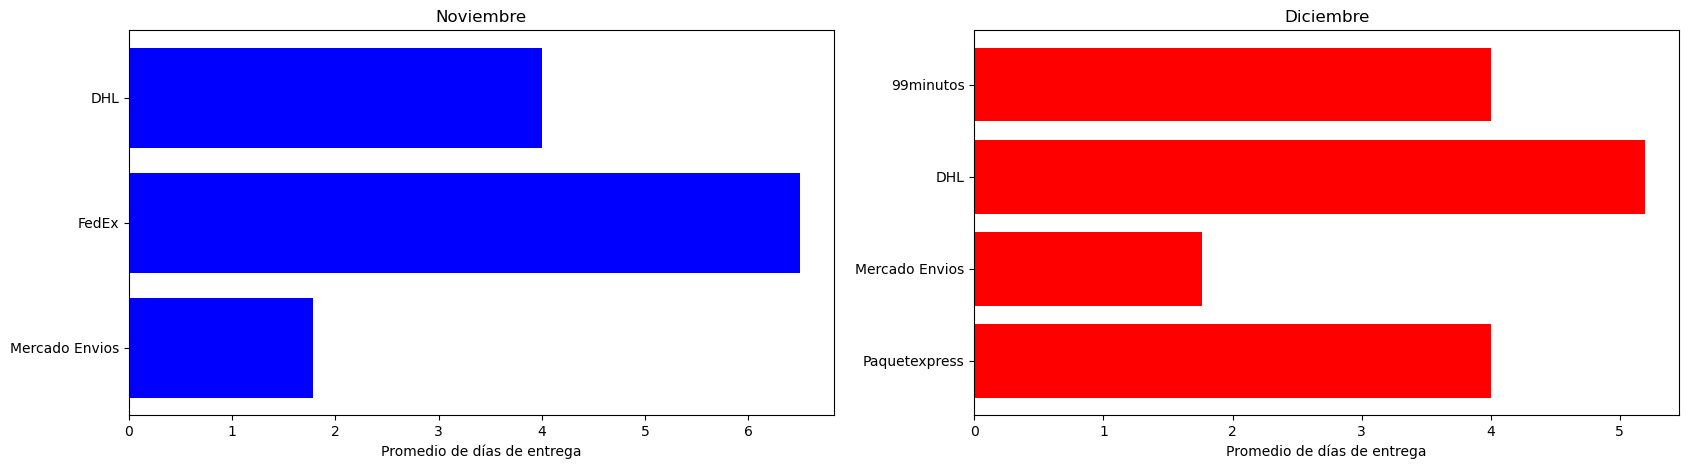

In [54]:
fig, axs = plt.subplots(1,2,figsize=(20,5))

axs[0].barh(november['Transportista'], november['AVG Duration'], color='blue')
axs[0].set_xlabel('Promedio de días de entrega')
axs[0].set_title('Noviembre')
axs[0].invert_yaxis()  

axs[1].barh(december['Transportista'], december['AVG Duration'], color='red')
axs[1].set_xlabel('Promedio de días de entrega')
axs[1].set_title('Diciembre')
axs[1].invert_yaxis()


plt.show()

In [60]:
df[df['IDproducto']=='MLM937274388']

,IDVenta,Unidades,Ingresos por productos (MXN),Cargo por venta e impuestos,Costos de envío,Total (MXN),Venta por publicidad,IDproducto,Canal de venta,Precio unitario de venta de la publicación (MXN),Municipio/Alcaldía,Estado,Código postal,Forma de entrega,Transportista,Fecha Venta,FechaCamino,FechaEntrega,month,Duration
1,2000004071652834,1,175.00,-64.830002,-99.00,110.169998,No,MLM937274388,Mercado Libre,295.0,Cuautitlan,Estado De México,54870,Mercado Envíos Full,Mercado Envios,2021-11-12,2021-11-12,2021-11-12,11,0
24,2000003768195709,1,185.00,-67.099998,0.00,117.900002,No,MLM937274388,Mercado Libre,295.0,Guadalajara,Jalisco,44340,Correo y puntos de despacho,Mercado Envios,2021-12-20,2021-12-20,2021-12-21,12,1
25,2000004084114222,1,185.00,-67.099998,-94.00,117.900002,Sí,MLM937274388,Mercado Libre,295.0,Morelia,Michoacán,58000,Correo y puntos de despacho,Mercado Envios,2021-12-08,2021-12-08,2021-12-09,12,1
26,2000004083415482,1,185.00,-67.099998,-98.00,117.900002,No,MLM937274388,Mercado Libre,295.0,Xochitepec,Morelos,62790,Correo y puntos de despacho,Mercado Envios,2021-12-07,2021-12-07,2021-12-08,12,1
27,2000003764116025,1,147.25,-58.520000,0.00,88.730003,No,MLM937274388,Mercado Libre,295.0,Puebla,Puebla,72370,Correo y puntos de despacho,Mercado Envios,2021-12-06,2021-12-06,2021-12-07,12,1
28,2000003760500027,2,370.00,-134.210007,0.00,235.789993,Sí,MLM937274388,Mercado Libre,295.0,León,Guanajuato,37234,Mercado Envíos Full,Mercado Envios,2021-11-12,2021-11-13,2021-11-13,11,1
29,2000003758667271,2,350.00,-129.660004,-20.00,220.339996,Sí,MLM937274388,Mercado Libre,295.0,Cuauhtémoc,Distrito Federal,6720,Mercado Envíos Full,Mercado Envios,2021-11-11,2021-11-12,2021-11-12,11,1
30,2000003757217191,3,555.00,-201.309998,0.00,353.690002,No,MLM937274388,Mercado Libre,295.0,Ecatepec de Morelos,Estado De México,55137,Mercado Envíos Full,Mercado Envios,2021-11-07,2021-11-08,2021-11-08,11,1
31,2000004065339602,1,185.00,-67.099998,-97.00,117.900002,No,MLM937274388,Mercado Libre,295.0,Nezahualcoyotl,Estado De México,57200,Mercado Envíos Full,Mercado Envios,2021-11-07,2021-11-08,2021-11-08,11,1
32,2000004065207656,1,185.00,-67.099998,-94.00,117.900002,Sí,MLM937274388,Mercado Libre,295.0,Guadalajara,Jalisco,44860,Mercado Envíos Full,Mercado Envios,2021-11-05,2021-11-05,2021-11-06,11,1


# Resultados después del análsis exploratorio


### Datos del proyecto: Potenciando Ventas y Estrategias en Numismática Mexico para fin de año 2022.

### Presentación de objetivos e ideas:

El objetivo principal es analizar detalladamente el histórico de ventas de Numismática Mexico durante los meses de noviembre y diciembre de 2021, con el propósito de proporcionar insights estratégicos que impulsen el desempeño comercial durante los eventos de fin de año para el 2022. Nos enfocaremos en identificar estados con potencial de crecimiento en ventas y adoptar características exitosas de los estados con mejores ingresos para potenciar el crecimiento en dichos mercados. Además, buscamos identificar oportunidades de mejora en la estrategia comercial, como la optimización de la inversión en publicidad y la selección de productos a promocionar, para asegurar un enfoque efectivo y centrado en resultados.

### Beneficios del proyecto:

* Mejor comprensión del comportamiento de compra de los clientes durante los eventos de fin de año.

* Identificación de oportunidades de mejora en la estrategia comercial, como la optimización de la inversión en publicidad y la selección de productos a promocionar.

* Mejora en la planificación logística al conocer los tiempos de entrega promedio y la eficiencia de los distribuidores.

* Mayor enfoque en los estados con mayor potencial de ventas, lo que permitirá una asignación más efectiva de recursos.

* Identificación y adopción de características exitosas de los estados con mejores ingresos en estados con potencial de crecimiento, para impulsar el crecimiento de ventas en esos mercados emergentes.

### Definir Indicadores del negocio:


| KPIs | Preguntas a Responder | Tipos de Datos a Analizar |
|:-----------|:-----------:|-----------:|
| Días más relevantes en ingresos | ¿Cuáles fueron los días con mayores ingresos y por qué? | Ingresos por productos (MXN) - Fecha Venta |
| Ventas por estado | ¿Cómo se distribuyen las ventas por estado? | Ingresos por productos (MXN) - Estado|
| Tiempos de entrega | ¿Cuál es el tiempo de entrega promedio por día y transportista?  | FechaEntrega - Fecha Venta - Transportista |
| Ventas por publicidad vs naturales | ¿Existe diferencia en las ventas entre productos promocionados y no promocionados? | IDproducto -  Total (MXN - Venta por publicidad |
| Identificación de estados con potencial de crecimiento | ¿Qué estados muestran potencial de crecimiento en ventas? | Estado -  IDproducto - Canal de venta - Transportista - FechaEntrega |
| Adopción de características exitosas de estados | ¿Qué características exitosas de los estados con mayores ingresos pueden aplicarse en estados con potencial de crecimiento? | Estado -  IDproducto - Canal de venta - Transportista - FechaEntrega |

